In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# read in fire csv
fire_db = pd.read_csv('clean_fire.csv') 
print(len(fire_db))
fire_db.sort_values('incident_name').head()

398


,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created
348,3-19 Fire,Mendocino,62.0,-123.013667,39.276000,Wildfire,8-21-2020,8-18-2020
340,3-2 Fire,San Luis Obispo,20.0,-120.801074,35.519723,Wildfire,8-17-2020,8-16-2020
344,4-8 Fire,Glenn,275.0,-122.501246,39.555943,Wildfire,8-19-2020,8-17-2020
183,46 Fire,Riverside,328.0,-117.414111,33.985972,Wildfire,11-3-2019,10-31-2019
257,58 Fire,Riverside,12.0,-115.965940,33.276650,Wildfire,6-27-2020,6-24-2020


In [3]:
i=0

for index,row in fire_db.iterrows():
    date = row[7].replace('-', '/')
    fire_db.at[i,'date_created'] = date
    i=i+1
fire_db = fire_db.dropna(how='any')
j = 0

for index,row in fire_db.iterrows():
    date2 = row[6].replace('-', '/')
    fire_db.at[j,'date_extinguished'] = date2
    j=j+1
fire_db = fire_db.dropna(how='any')
fire_db

,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created
0,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,5/25/2009,5/24/2009
1,Sand Fire,"Amador, El Dorado",4240.0,-120.78190,38.56910,Wildfire,8/2/2014,7/25/2014
2,Atlas Fire (Southern LNU Complex),"Napa, Solano",51624.0,-122.24367,38.39206,Wildfire,2/9/2018,10/8/2017
3,Tubbs Fire (Central LNU Complex),"Napa, Sonoma",36807.0,-122.62879,38.60895,Wildfire,2/9/2018,10/8/2017
4,Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...,"Napa, Sonoma",56556.0,-122.52090,38.40410,Wildfire,2/9/2018,10/8/2017
...,...,...,...,...,...,...,...,...
393,Sanderson Fire,Riverside,1933.0,-117.03459,33.93244,Wildfire,12/14/2020,12/13/2020
394,Erbes Fire,Ventura,250.0,-118.83967,34.20955,Wildfire,1/15/2021,1/14/2021
395,72 Fire,Riverside,43.0,-116.10723,33.52871,Wildfire,1/20/2021,1/19/2021
396,Panther Ridge Fire,Santa Cruz,20.0,-122.13372,37.18381,Wildfire,1/22/2021,1/19/2021


In [4]:
# the first goal is to create a new row for each county that experiences a fire, not just one row per fire.
#     this way, the danger scores can be applied per county per fire instead of just per fire.

# split "county" column on commas to break the counties apart
splitcounties_df = fire_db['county'].str.split(', ', expand=True)
splitcounties_df.columns =['county1', 'county2', 'county3', 'county4', 'county5', 'county6', 'county7']
splitcounties_df.head()

,county1,county2,county3,county4,county5,county6,county7
0,San Diego,None,None,None,None,None,None
1,Amador,El Dorado,None,None,None,None,None
2,Napa,Solano,None,None,None,None,None
3,Napa,Sonoma,None,None,None,None,None
4,Napa,Sonoma,None,None,None,None,None


In [5]:
# add broken out counties back to dataframe to maintain relationship between counties and all other data in df
combinedfire_df = fire_db.join(splitcounties_df)
combinedfire_df.head()

,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,county1,county2,county3,county4,county5,county6,county7
0,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,5/25/2009,5/24/2009,San Diego,None,None,None,None,None,None
1,Sand Fire,"Amador, El Dorado",4240.0,-120.78190,38.56910,Wildfire,8/2/2014,7/25/2014,Amador,El Dorado,None,None,None,None,None
2,Atlas Fire (Southern LNU Complex),"Napa, Solano",51624.0,-122.24367,38.39206,Wildfire,2/9/2018,10/8/2017,Napa,Solano,None,None,None,None,None
3,Tubbs Fire (Central LNU Complex),"Napa, Sonoma",36807.0,-122.62879,38.60895,Wildfire,2/9/2018,10/8/2017,Napa,Sonoma,None,None,None,None,None
4,Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...,"Napa, Sonoma",56556.0,-122.52090,38.40410,Wildfire,2/9/2018,10/8/2017,Napa,Sonoma,None,None,None,None,None


In [6]:
# create new dataframe to populate with new rows
col_names =  ['incident_name', 'county', 'acres_burned', 'longitude', 'latitude', 'incident_type', 'date_extinguished', 'date_created', 'county1', 'county2', 'county3', 'county4', 'county5', 'county6', 'county7']

newcountyrows_df  = pd.DataFrame(columns = col_names) 
 
newcountyrows_df

,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,county1,county2,county3,county4,county5,county6,county7


In [7]:
# loop through each row in the combinedfire_df dataframe to check for the counties broken out earlier in the code.
#     each time a broken-out county is encountered, create a new row with that county as the value for the 'county' column
#     instead of the list of counties that was there to start

i=0
for index, row in combinedfire_df.iterrows():
    if row[8] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county1']
        i=i+1
    if row[9] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county2']
        i=i+1
    if row[10] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county3']
        i=i+1
    if row[11] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county4']
        i=i+1
    if row[12] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county5']
        i=i+1
    if row[13] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county6']
        i=i+1
    if row[14] is not None:
        newcountyrows_df = newcountyrows_df.append(row, ignore_index=True)
        newcountyrows_df.at[i,'county'] = newcountyrows_df.at[i,'county7']
        i=i+1
        
        
newcountyrows_df

,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,county1,county2,county3,county4,county5,county6,county7
0,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,5/25/2009,5/24/2009,San Diego,None,None,None,None,None,None
1,Sand Fire,Amador,4240.0,-120.78190,38.56910,Wildfire,8/2/2014,7/25/2014,Amador,El Dorado,None,None,None,None,None
2,Sand Fire,El Dorado,4240.0,-120.78190,38.56910,Wildfire,8/2/2014,7/25/2014,Amador,El Dorado,None,None,None,None,None
3,Atlas Fire (Southern LNU Complex),Napa,51624.0,-122.24367,38.39206,Wildfire,2/9/2018,10/8/2017,Napa,Solano,None,None,None,None,None
4,Atlas Fire (Southern LNU Complex),Solano,51624.0,-122.24367,38.39206,Wildfire,2/9/2018,10/8/2017,Napa,Solano,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,Sanderson Fire,Riverside,1933.0,-117.03459,33.93244,Wildfire,12/14/2020,12/13/2020,Riverside,None,None,None,None,None,None
431,Erbes Fire,Ventura,250.0,-118.83967,34.20955,Wildfire,1/15/2021,1/14/2021,Ventura,None,None,None,None,None,None
432,72 Fire,Riverside,43.0,-116.10723,33.52871,Wildfire,1/20/2021,1/19/2021,Riverside,None,None,None,None,None,None
433,Panther Ridge Fire,Santa Cruz,20.0,-122.13372,37.18381,Wildfire,1/22/2021,1/19/2021,Santa Cruz,None,None,None,None,None,None


In [8]:
# as the counties for each fire now each have their own rows, county1-county7 can be dropped without consequence.
expanded_fires = newcountyrows_df.loc[:,'incident_name':'date_created']

#add a new column to the dataframe to store fire duration information.
expanded_fires['fire_duration_days']=""
expanded_fires.head()

,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,fire_duration_days
0,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,5/25/2009,5/24/2009,
1,Sand Fire,Amador,4240.0,-120.78190,38.56910,Wildfire,8/2/2014,7/25/2014,
2,Sand Fire,El Dorado,4240.0,-120.78190,38.56910,Wildfire,8/2/2014,7/25/2014,
3,Atlas Fire (Southern LNU Complex),Napa,51624.0,-122.24367,38.39206,Wildfire,2/9/2018,10/8/2017,
4,Atlas Fire (Southern LNU Complex),Solano,51624.0,-122.24367,38.39206,Wildfire,2/9/2018,10/8/2017,


In [9]:
# convert the date strings to datetime

expanded_fires['date_extinguished'] = pd.to_datetime(expanded_fires['date_extinguished'], format='%m/%d/%Y')
expanded_fires['date_created'] = pd.to_datetime(expanded_fires['date_created'], format='%m/%d/%Y')
print(expanded_fires.dtypes)
expanded_fires.head()

incident_name                 object
county                        object
acres_burned                 float64
longitude                    float64
latitude                     float64
incident_type                 object
date_extinguished     datetime64[ns]
date_created          datetime64[ns]
fire_duration_days            object
dtype: object


,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,fire_duration_days
0,Pala Fire,San Diego,122.0,1.00000,1.00000,Wildfire,2009-05-25,2009-05-24,
1,Sand Fire,Amador,4240.0,-120.78190,38.56910,Wildfire,2014-08-02,2014-07-25,
2,Sand Fire,El Dorado,4240.0,-120.78190,38.56910,Wildfire,2014-08-02,2014-07-25,
3,Atlas Fire (Southern LNU Complex),Napa,51624.0,-122.24367,38.39206,Wildfire,2018-02-09,2017-10-08,
4,Atlas Fire (Southern LNU Complex),Solano,51624.0,-122.24367,38.39206,Wildfire,2018-02-09,2017-10-08,


In [10]:
# loop through the dataframe to subtract each fire's start date from its end date to determine how many days the fire burned.
#     populate the result to the fire_duration_days column and convert the number to an integer so math can be performed
#     on it.
i=0
for index,row in expanded_fires.iterrows():
    start = expanded_fires.at[i,'date_created']
    end = expanded_fires.at[i,'date_extinguished']
    duration = end-start
    expanded_fires.at[i,'fire_duration_days'] = duration.days
    i=i+1

expanded_fires["fire_duration_days"] = expanded_fires["fire_duration_days"].astype(str).astype(int) 
  
print(expanded_fires.dtypes)
    
expanded_fires.sort_values('fire_duration_days')

incident_name                 object
county                        object
acres_burned                 float64
longitude                    float64
latitude                     float64
incident_type                 object
date_extinguished     datetime64[ns]
date_created          datetime64[ns]
fire_duration_days             int32
dtype: object


,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,fire_duration_days
168,Inghram Fire,Tehama,10.0,-122.160416,39.847708,Wildfire,2019-10-08,2019-10-09,-1
160,Elk Fire,Glenn,63.0,-123.437500,41.706111,Wildfire,2019-10-03,2019-10-04,-1
208,Wood Fire,Lassen,57.0,-120.493920,40.621550,Wildfire,2020-02-23,2020-02-23,0
95,Preston Fire,Tuolumne,21.0,-120.420058,37.949747,Wildfire,2019-08-08,2019-08-08,0
214,Byron Fire,Contra Costa,47.0,-121.595225,37.820660,Wildfire,2020-04-27,2020-04-27,0
...,...,...,...,...,...,...,...,...,...
22,Horse Fire,Calaveras,80.0,-120.689020,37.957660,Wildfire,2019-01-04,2018-06-24,194
21,Pawnee Fire,Lake,15185.0,-122.598480,39.067400,Wildfire,2019-01-04,2018-06-23,195
20,Stoll Fire,Tehama,268.0,-122.275740,40.183950,Wildfire,2019-01-04,2018-06-23,195
19,Creek Fire,San Luis Obispo,10.0,-120.392950,35.057470,Wildfire,2019-01-04,2018-06-21,197


In [11]:
# loop through the dataframe to create a measure for the average speed at which a fire spread in acres per day.
#     account for fire_duration_days values of 1 or 0 by setting their value to 1 so it won't cause math problems later.
expanded_fires['fire_speed']=""
i=0
for index,row in expanded_fires.iterrows():
    span = expanded_fires.at[i,'acres_burned']
    days = expanded_fires.at[i,'fire_duration_days']
    if days < 2:
        speed = 1
    else:
        speed = round(span/days)
    expanded_fires.at[i,'fire_speed'] = speed
    i=i+1

expanded_fires.sort_values('fire_speed', ascending=False).head(50)

,incident_name,county,acres_burned,longitude,latitude,incident_type,date_extinguished,date_created,fire_duration_days,fire_speed
365,August Complex (includes Doe Fire),Lake,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
363,August Complex (includes Doe Fire),Tehama,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
361,August Complex (includes Doe Fire),Humboldt,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
364,August Complex (includes Doe Fire),Glenn,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
362,August Complex (includes Doe Fire),Trinity,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
366,August Complex (includes Doe Fire),Colusa,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
360,August Complex (includes Doe Fire),Mendocino,1032648.0,-122.673000,39.776000,Wildfire,2020-11-11,2020-08-16,87,11870
50,Camp Fire,Butte,153336.0,-121.434700,39.813400,Wildfire,2018-11-25,2018-11-08,17,9020
376,SCU Lightning Complex,Stanislaus,396624.0,-121.304350,37.439437,Wildfire,2020-10-01,2020-08-18,44,9014
374,SCU Lightning Complex,Contra Costa,396624.0,-121.304350,37.439437,Wildfire,2020-10-01,2020-08-18,44,9014


{'whiskers': [<matplotlib.lines.Line2D at 0x162798addc0>,
 'caps': [<matplotlib.lines.Line2D at 0x16279f564c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162798ada60>],
 'medians': [<matplotlib.lines.Line2D at 0x16279f56b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x16279f56e80>],
 'means': []}

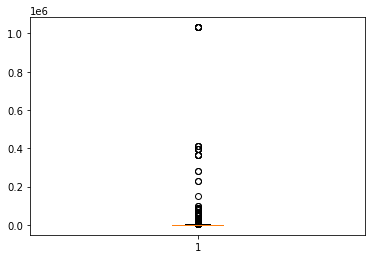

In [12]:
plt.boxplot(expanded_fires['acres_burned'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16279fe0a00>,
 'caps': [<matplotlib.lines.Line2D at 0x16279feb100>,
 'boxes': [<matplotlib.lines.Line2D at 0x16279fe06a0>],
 'medians': [<matplotlib.lines.Line2D at 0x16279feb7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16279febac0>],
 'means': []}

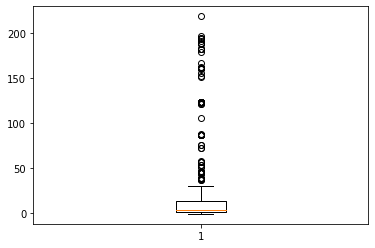

In [13]:
plt.boxplot(expanded_fires['fire_duration_days'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1627a035df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1627a0414f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1627a035a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1627a041bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1627a041eb0>],
 'means': []}

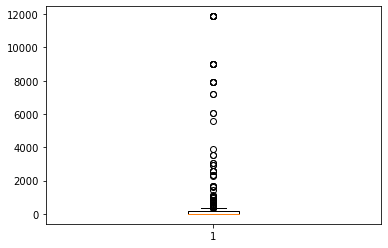

In [14]:
plt.boxplot(expanded_fires['fire_speed'])

In [15]:
# because this dataset contains extreme outliers as visualized above, outliers will need to be excluded from the dataset
#     in order to create meaningful danger categories
q1ab = np.percentile(expanded_fires.acres_burned, 25) 
medab = np.percentile(expanded_fires.acres_burned, 50)
q3ab = np.percentile(expanded_fires.acres_burned, 75)

q1fdd = np.percentile(expanded_fires.fire_duration_days, 25) 
medfdd = np.percentile(expanded_fires.fire_duration_days, 50)
q3fdd = np.percentile(expanded_fires.fire_duration_days, 75)

q1fs = np.percentile(expanded_fires.fire_speed, 25) 
medfs = np.percentile(expanded_fires.fire_speed, 50)
q3fs = np.percentile(expanded_fires.fire_speed, 75)

print(f'Q1 acres burned: {q1ab}')
print(f'Median acres burned: {medab}')
print(f'Q3 acres burned: {q3ab}')
print("=====")

print(f'Q1 duration: {q1fdd}')
print(f'Median duration: {medfdd}')
print(f'Q3 duration: {q3fdd}')
print("=====")

print(f'Q1 speed: {q1fs}')
print(f'Median speed: {medfs}')
print(f'Q3 speed: {q3fs}')


Q1 acres burned: 50.0
Median acres burned: 178.0
Q3 acres burned: 1383.0
=====
Q1 duration: 1.0
Median duration: 3.0
Q3 duration: 13.0
=====
Q1 speed: 1.0
Median speed: 12.0
Q3 speed: 151.5


In [16]:
# # create dataframe where each there is only one row per fire again
# unexpanded_fires = expanded_fires.drop_duplicates(['incident_name', 'acres_burned'])
# unexpanded_fires.sort_values('incident_name')

218


{'whiskers': [<matplotlib.lines.Line2D at 0x1627a097be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1627a0a12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1627a097880>],
 'medians': [<matplotlib.lines.Line2D at 0x1627a0a19a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1627a0a1ca0>],
 'means': []}

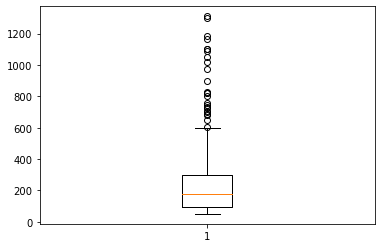

In [17]:
# create new dataframes excluding outliers and visualize the data
acres_iqr = expanded_fires.drop(expanded_fires["acres_burned"].loc[expanded_fires["acres_burned"]>q3ab].index)
acres_iqr = acres_iqr.drop(acres_iqr["acres_burned"].loc[acres_iqr["acres_burned"]<q1ab].index)
print(len(acres_iqr))
plt.boxplot(acres_iqr["acres_burned"])

246


{'whiskers': [<matplotlib.lines.Line2D at 0x1627a0f0af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1627a0fa1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1627a0f06d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1627a0fa7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1627a0faac0>],
 'means': []}

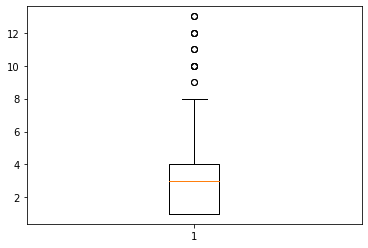

In [18]:
duration_iqr = expanded_fires.drop(expanded_fires["fire_duration_days"].loc[expanded_fires["fire_duration_days"]>q3fdd].index)
duration_iqr = duration_iqr.drop(duration_iqr["fire_duration_days"].loc[duration_iqr["fire_duration_days"]<q1fdd].index)
print(len(duration_iqr))
plt.boxplot(duration_iqr["fire_duration_days"])

319


{'whiskers': [<matplotlib.lines.Line2D at 0x1627a14e0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1627a14e7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1627a13fd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1627a14ee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1627a1561c0>],
 'means': []}

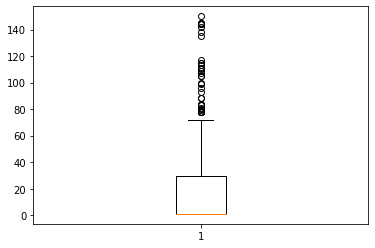

In [19]:
speed_iqr = expanded_fires.drop(expanded_fires["fire_speed"].loc[expanded_fires["fire_speed"]>q3fs].index)
speed_iqr = speed_iqr.drop(speed_iqr["fire_speed"].loc[speed_iqr["fire_speed"]<q1fs].index)
print(len(speed_iqr))
plt.boxplot(speed_iqr["fire_speed"])

In [20]:
# visualizations show that, as expected, even with outliers removed,
#     the vast majority of fires skew towards fewer acres burned, a short duration, and slower speeds.

In [21]:
# set the danger categories for each fire, 
# then, create a formula where acres burned x duration x speed / 3 = danger score for each county 
#     and create a dataframe attaching a danger score to each fire incident

lowestdanger_ab = float(np.percentile(expanded_fires.acres_burned, 20))
lowdanger_ab = float(np.percentile(expanded_fires.acres_burned, 40))
meddanger_ab = float(np.percentile(expanded_fires.acres_burned, 60))
highdanger_ab = float(np.percentile(expanded_fires.acres_burned, 80))
highestdanger_ab = float(np.percentile(expanded_fires.acres_burned, 100))

lowestdanger_fdd = float(np.percentile(expanded_fires.fire_duration_days, 20))
lowdanger_fdd = float(np.percentile(expanded_fires.fire_duration_days, 40))
meddanger_fdd = float(np.percentile(expanded_fires.fire_duration_days, 60))
highdanger_fdd = float(np.percentile(expanded_fires.fire_duration_days, 80))
highestdanger_fdd = float(np.percentile(expanded_fires.fire_duration_days, 100))

lowestdanger_fs = float(np.percentile(expanded_fires.fire_speed, 20))
lowdanger_fs = float(np.percentile(expanded_fires.fire_speed, 40))
meddanger_fs = float(np.percentile(expanded_fires.fire_speed, 60))
highdanger_fs = float(np.percentile(expanded_fires.fire_speed, 80))
highestdanger_fs = float(np.percentile(expanded_fires.fire_speed, 100))

i=0
for index, row in expanded_fires.iterrows():
    if row['acres_burned'] <= lowestdanger_ab:
        abscore=20
        expanded_fires.at[i,'abscore'] = abscore
        i=i+1
    elif row['acres_burned'] > lowestdanger_ab and row['acres_burned'] <= lowdanger_ab:
        abscore =40
        expanded_fires.at[i,'abscore'] = abscore
        i=i+1
    elif row['acres_burned'] > lowdanger_ab and row['acres_burned'] <= meddanger_ab:
        abscore =60
        expanded_fires.at[i,'abscore'] = abscore
        i=i+1
    elif row['acres_burned'] > meddanger_ab and row['acres_burned'] <= highdanger_ab:
        abscore =80
        expanded_fires.at[i,'abscore'] = abscore
        i=i+1
    else:
        abscore =100
        expanded_fires.at[i,'abscore'] = abscore
        i=i+1
    
i=0
for index, row in expanded_fires.iterrows():
    if row['fire_duration_days'] < lowestdanger_fdd:
        fddscore=20
        expanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] == lowestdanger_fdd:
        fddscore=20
        expanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] > lowestdanger_fdd and row['fire_duration_days'] < lowdanger_fdd:
        fddscore =40
        expanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] > lowdanger_fdd and row['fire_duration_days'] < meddanger_fdd:
        fddscore =60
        expanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    elif row['fire_duration_days'] > meddanger_fdd and row['fire_duration_days'] < highdanger_fdd:
        fddscore =80
        expanded_fires.at[i,'fddscore'] = fddscore
        i=i+1
    else:
        fddscore =100
        expanded_fires.at[i,'fddscore'] = fddscore
        i=i+1

i=0
for index, row in expanded_fires.iterrows():
    if row['fire_speed'] < lowestdanger_fs:
        fsscore=20
        expanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    elif row['fire_speed'] > lowestdanger_fs and row['fire_speed'] < lowdanger_fs:
        fsscore =40
        expanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    elif row['fire_speed'] > lowdanger_fs and row['fire_speed'] < meddanger_fs:
        fsscore =60
        expanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    elif row['fire_speed'] > meddanger_fs and row['fire_speed'] < highdanger_fs:
        fsscore =80
        expanded_fires.at[i,'fsscore'] = fsscore
        i=i+1
    else:
        fsscore =100
        expanded_fires.at[i,'fsscore'] = fsscore
        i=i+1

initial_scores = expanded_fires[['incident_name', 'abscore', 'fddscore', 'fsscore']].dropna(subset=['incident_name']).fillna(1)
initial_scores


,incident_name,abscore,fddscore,fsscore
0,Pala Fire,60.0,20.0,100.0
1,Sand Fire,100.0,80.0,100.0
2,Sand Fire,100.0,80.0,100.0
3,Atlas Fire (Southern LNU Complex),100.0,100.0,100.0
4,Atlas Fire (Southern LNU Complex),100.0,100.0,100.0
...,...,...,...,...
430,Sanderson Fire,80.0,20.0,100.0
431,Erbes Fire,60.0,20.0,100.0
432,72 Fire,40.0,20.0,100.0
433,Panther Ridge Fire,20.0,60.0,60.0


In [22]:
initial_scores[initial_scores['abscore'].isna()]

,incident_name,abscore,fddscore,fsscore


In [23]:
# continued from previous block
i=0
for index, row in expanded_fires.iterrows():
    initial_scores.at[i,'fire_danger_score']= (row['abscore'] + row['fddscore']+row['fsscore'])/3
    i = i+1

danger_df = initial_scores[['incident_name', 'fire_danger_score']]
danger_df.sort_values('incident_name').head(60)

,incident_name,fire_danger_score
377,3-19 Fire,53.333333
358,3-2 Fire,46.666667
368,4-8 Fire,80.000000
199,46 Fire,73.333333
274,58 Fire,46.666667
432,72 Fire,53.333333
74,Aborn Fire,53.333333
427,Airport Fire,80.000000
297,Alum Fire,46.666667
161,American Fire,66.666667


In [24]:
danger_df = danger_df.dropna(subset=['incident_name'])
danger_df.sort_values('incident_name').head(60)

,incident_name,fire_danger_score
377,3-19 Fire,53.333333
358,3-2 Fire,46.666667
368,4-8 Fire,80.000000
199,46 Fire,73.333333
274,58 Fire,46.666667
432,72 Fire,53.333333
74,Aborn Fire,53.333333
427,Airport Fire,80.000000
297,Alum Fire,46.666667
161,American Fire,66.666667


In [25]:
# create a table that assigns the danger value to the fire incident and each county in which the fire took place
final_fire_df= expanded_fires.join(danger_df,how ="outer", rsuffix="_r")
final_fire_df= final_fire_df[['incident_name','county','fire_danger_score']]
final_fire_df.sort_values('incident_name').head(60)

,incident_name,county,fire_danger_score
377,3-19 Fire,Mendocino,53.333333
358,3-2 Fire,San Luis Obispo,46.666667
368,4-8 Fire,Glenn,80.000000
199,46 Fire,Riverside,73.333333
274,58 Fire,Riverside,46.666667
432,72 Fire,Riverside,53.333333
74,Aborn Fire,Santa Clara,53.333333
427,Airport Fire,Riverside,80.000000
297,Alum Fire,Santa Clara,46.666667
161,American Fire,Napa,66.666667


In [26]:
final_fire_df[final_fire_df['fire_danger_score'].isna()]

,incident_name,county,fire_danger_score


In [27]:
final_fire_df.to_csv('fire_danger_csv.csv', index=False)
final = pd.read_csv('fire_danger_csv.csv') 
final

,incident_name,county,fire_danger_score
0,Pala Fire,San Diego,60.000000
1,Sand Fire,Amador,93.333333
2,Sand Fire,El Dorado,93.333333
3,Atlas Fire (Southern LNU Complex),Napa,100.000000
4,Atlas Fire (Southern LNU Complex),Solano,100.000000
...,...,...,...
430,Sanderson Fire,Riverside,66.666667
431,Erbes Fire,Ventura,60.000000
432,72 Fire,Riverside,53.333333
433,Panther Ridge Fire,Santa Cruz,46.666667
